In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv


In [2]:
df = pd.read_csv('picture_coords.csv', header=None)
df.head(10)

,0,1
0,40.864413,-73.893292
1,38.884714,-76.927431
2,42.367025,-83.115961
3,37.798462,-122.423526
4,41.699542,-87.690806
5,41.736580,-87.572423
6,40.728867,-73.806535
7,37.781188,-122.495259
8,38.921437,-77.074337
9,38.870786,-76.950534


In [3]:
df.columns = ["latitude", "longitude"]
df.head(10)

,latitude,longitude
0,40.864413,-73.893292
1,38.884714,-76.927431
2,42.367025,-83.115961
3,37.798462,-122.423526
4,41.699542,-87.690806
5,41.736580,-87.572423
6,40.728867,-73.806535
7,37.781188,-122.495259
8,38.921437,-77.074337
9,38.870786,-76.950534


In [4]:
X=df.loc[:,['latitude','longitude']]
X.head(10)


,latitude,longitude
0,40.864413,-73.893292
1,38.884714,-76.927431
2,42.367025,-83.115961
3,37.798462,-122.423526
4,41.699542,-87.690806
5,41.736580,-87.572423
6,40.728867,-73.806535
7,37.781188,-122.495259
8,38.921437,-77.074337
9,38.870786,-76.950534


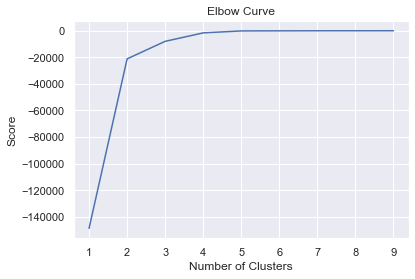

In [5]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude']]
X_axis = df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [6]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X[X.columns[1:2]]) # Compute k-means clustering.
X['city_label'] = kmeans.fit_predict(X[X.columns[1:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:2]]) # Labels of each point
X.head(10)


,latitude,longitude,city_label
0,40.864413,-73.893292,2
1,38.884714,-76.927431,4
2,42.367025,-83.115961,1
3,37.798462,-122.423526,0
4,41.699542,-87.690806,3
5,41.736580,-87.572423,3
6,40.728867,-73.806535,2
7,37.781188,-122.495259,0
8,38.921437,-77.074337,4
9,38.870786,-76.950534,4


In [7]:
X.to_csv("training_data_clustered.csv", sep=',', encoding='utf-8')